### Description 

Body composition was profiled based on DXA (dual-energy x-ray absorptiometry) imaging, and includes measurements of fat and lean mass for the legs, arms, trunk, gynoid, and android, as well as measurements of total scan visceral adipose tissue (VAT) and subcutaneous adipose tissue (SAT) area, mass and volume are included.

### Introduction

DXA (dual-energy x-ray absorptiometry) is a medical imaging technique that is used to measure body composition, specifically the amounts of bone, fat, and lean muscle tissue in the body. A DXA scan uses a low dose of ionizing radiation to produce a detailed image of the body, which is then analyzed by a software to determine the body composition. This method is considered to be one of the most accurate methods for measuring body composition, as it is able to distinguish between different types of tissue and provide detailed information about the distribution of fat and muscle in the body. DXA imaging is commonly used for assessing bone density and for monitoring changes in body composition over time, such as during weight loss, muscle building programs or for assessment of sarcopenia.

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
Dual-energy X-ray Absorptiometry (DXA) was performed with the GE Lunar Prodigy Advance device (GE Healthcare, USA) and the GE CoreScan software application. Before the scan, participants were asked to remove all metal items, heavy clothing and shoes. Each participant performed a total body scan in a supine position to determine percent body fat, fat mass, lean body mass, and bone mineral density. The total body composition is calculated for various regions (arms, legs, trunk, android, gynoid and total). The CoreScan also estimates the Visceral Adipose Tissue (VAT) and Subcutaneous Adipose Tissue (SAT) content within the android region. Bone mineral density was measured from the Femur necks, bilaterally and from the spine vertebra L1-L4. 

![DXA](dxa_machine.jpeg)

### Data availability 
<!-- for the example notebooks -->
The information is stored in 1 parquet file: `body_composition.parquet`

### Summary of available data 
<!-- for the data browser -->
1. **Regional body composition measurements:**
   - Fat and lean mass for legs, arms, trunk, gynoid region, and android region
   - Total body fat percentage and total lean mass
2. **Adipose tissue measurements:**
   - Visceral adipose tissue (VAT) area, mass, and volume
   - Subcutaneous adipose tissue (SAT) area, mass, and volume
   - VAT/SAT ratios
3. **Imaging files:**
   - DXA image files (e.g., total body composition - %fat)
   - DXA image DICOM files

### Relevant links

* [Pheno Knowledgebase](https://knowledgebase.pheno.ai/datasets/011-body_composition.html)
* [Pheno Data Browser](https://pheno-demo-app.vercel.app/folder/11)


In [1]:
#| echo: false
import pandas as pd
pd.set_option("display.max_rows", 500)

In [2]:
from pheno_utils import PhenoLoader

In [3]:
pl = PhenoLoader('body_composition')
pl

PhenoLoader for body_composition with
157 fields
2 tables: ['body_composition', 'age_sex']

# Data dictionary

In [4]:
pl.dict

,folder_id,feature_set,field_string,relative_location,field_type,data_coding,bulk_file_extension,description_string,stability,units,sampling_rate,strata,sexed,array,list_of_tags,debut,transformation,pandas_dtype,completed,bulk_dictionary
tabular_field_name,,,,,,,,,,,,,,,,,,,,
collection_date,11,body_composition,Collection date (YYYY-MM-DD),body_composition/body_composition.parquet,Date,NaN,NaN,Collection date (YYYY-MM-DD),NaN,Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,datetime64[ns],NaN,NaN
timezone,11,body_composition,Timezone,body_composition/body_composition.parquet,Categorical (single),NaN,NaN,Timezone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,string,NaN,NaN
collection_timestamp,11,body_composition,Collection timestamp,body_composition/body_composition.parquet,Date,NaN,NaN,Collection timestamp,Accruing,Time,NaN,Primary,Both sexes,Single,NaN,2020-06-09,NaN,"datetime64[ns, Asia/Jerusalem]",NaN,NaN
body_comp_android_bone_mass,11,body_composition,Body composition android bone mass,body_composition/body_composition.parquet,Continuous,NaN,NaN,Body composition android bone mass,Accruing,gram,NaN,Primary,Both sexes,Single,NaN,2020-06-09,NaN,float,NaN,NaN
body_comp_android_fat_free_mass,11,body_composition,Body composition android fat free mass,body_composition/body_composition.parquet,Continuous,NaN,NaN,Body composition android fat free mass,Accruing,gram,NaN,Primary,Both sexes,Single,NaN,2020-06-09,NaN,float,NaN,NaN
body_comp_android_fat_mass,11,body_composition,Body composition android fat mass,body_composition/body_composition.parquet,Continuous,NaN,NaN,Body composition android fat mass,Accruing,gram,NaN,Primary,Both sexes,Single,NaN,2020-06-09,NaN,float,NaN,NaN
body_comp_android_lean_mass,11,body_composition,Body composition android lean mass,body_composition/body_composition.parquet,Continuous,NaN,NaN,Body composition android lean mass,Accruing,gram,NaN,Primary,Both sexes,Single,NaN,2020-06-09,NaN,float,NaN,NaN
body_comp_android_region_percent_fat,11,body_composition,Body composition android region percent fat,body_composition/body_composition.parquet,Continuous,NaN,NaN,Body composition android region percent fat,Accruing,%,NaN,Primary,Both sexes,Single,NaN,2020-06-09,NaN,float,NaN,NaN
body_comp_android_tissue_mass,11,body_composition,Body composition android tissue mass,body_composition/body_composition.parquet,Continuous,NaN,NaN,Body composition android tissue mass,Accruing,gram,NaN,Primary,Both sexes,Single,NaN,2020-06-09,NaN,float,NaN,NaN


# Plot histogram and ecdf for total_scan_vat_volume at baseline visit


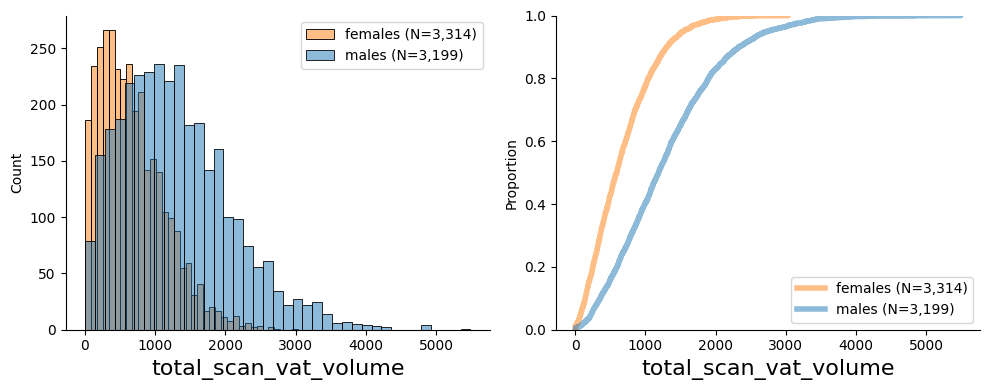

,count,mean,std,min,25%,50%,75%,max
total_scan_vat_volume,6513.0,973.39828,714.715803,0.0,424.852445,823.605279,1346.291129,5490.022629


In [5]:
from pheno_utils.basic_plots import hist_ecdf_plots

col = "total_scan_vat_volume"
df = pl[[col] + ["age", "sex", "collection_date"]].loc[:,:,"00_00_visit",0,:]

# plot histogram and ecdf
hist_ecdf_plots(df.dropna(subset=[col,"sex", "age"]), col, gender_col="sex")

# stats
display(df[col].describe().to_frame().T)